## Deskripi Proyek

Proyek ini mengulas dan mengidentifikasi data terkait ulasan pengguna dan ahli game, genre, platform (seperti Xbox atau PlayStation), dan data historis penjualan game dari sumber terbuka. Mengidentifikasi pola-pola yang menentukan apakah suatu game dapat dikatakan berhasil atau tidak, menemukan game yang paling berpotensial menaikan penjualan untuk dapat merencanakan kampanye iklannya.
langkah-langkah yang dilakukan yaitu:
1. Memuat library yang dibutuhkan
2. Memuat datanya
3. Melakukan Pra-pemrosesan
4. Analisis data
5. Pemprofilan pengguna berdasarkan wilayah
6. Hipotesis
7. Kesimpulan

## Memuat library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats as st
import seaborn as sns

## Memuat data

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# memeriksa kolom mana saja yang hilang
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Nama setiap kolom ada yang menggunakan huruf kapital, untuk mempermudah pegerjaan saya akan mengubahnya menjadi huruf kecil semua. Dan terdapat nilai yang hilang pada kolom Name, Year_of_Release, Critical_Score, User_Score, dan Rating. Nilai yang hilang pada kolom Name hanya ada 2, karena nilai yang hilang sedikit dan tidak akan berpengaruh terhadap proses penganalisisan maka di abaikan saja. untuk kolom NaN yang lain perlu dikaji lebih lanjut bagaimana mengisi NaN-nya.

## Pra-pemrosesan data

### Mengubah nama kolom

In [5]:
# mengubah huruf kapital pada nama kolom
df = df.rename(columns=lambda x: x.lower())
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Mengisi nilai yang hilang

#### name

nilai yang hilang pada kolom year_of_release sedikit dan tidak akan berpengaruh terhadap proses penganalisisan maka di abaikan saja dengan menggunakan dropna

In [6]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# Men-drop NaN
df = df.dropna(subset=['name'], axis = 0)
df = df.reset_index(drop=True)
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

#### year_of_release

In [8]:
# menampikan baris dengan NaN pada kolom year_of_release
df[df.year_of_release.isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [9]:
median_year_platform = df.groupby('platform')['year_of_release'].median()
median_year_platform['PS2']

2005.0

In [10]:
median_year_platform

platform
2600    1982.0
3DO     1995.0
3DS     2013.0
DC      2000.0
DS      2008.0
GB      1997.0
GBA     2003.0
GC      2003.0
GEN     1993.0
GG      1992.0
N64     1999.0
NES     1986.5
NG      1994.5
PC      2010.0
PCFX    1996.0
PS      1998.0
PS2     2005.0
PS3     2011.0
PS4     2015.0
PSP     2009.0
PSV     2014.0
SAT     1996.0
SCD     1994.0
SNES    1994.0
TG16    1995.0
WS      2000.0
Wii     2009.0
WiiU    2013.0
X360    2010.0
XB      2004.0
XOne    2015.0
Name: year_of_release, dtype: float64

In [11]:
# mengisi NaN pada kolom year_of_release
df['year_of_release'] = df.apply(lambda x: median_year_platform[x.platform]if
                                pd.isna(x.year_of_release) else x.year_of_release, axis=1)

In [12]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

#### critic_score

In [13]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [15]:
median_critic_score_1 = df.groupby('platform')['critic_score'].median()
median_critic_score_1

platform
2600     NaN
3DO      NaN
3DS     68.0
DC      88.0
DS      66.0
GB       NaN
GBA     69.0
GC      70.0
GEN      NaN
GG       NaN
N64      NaN
NES      NaN
NG       NaN
PC      78.0
PCFX     NaN
PS      73.5
PS2     70.0
PS3     73.0
PS4     73.0
PSP     68.0
PSV     71.0
SAT      NaN
SCD      NaN
SNES     NaN
TG16     NaN
WS       NaN
Wii     65.0
WiiU    73.5
X360    71.0
XB      72.0
XOne    76.0
Name: critic_score, dtype: float64

karena critic_score terhadap platform tidak ada datanya sehingga kita tidak dapat mengisi missing value-nya, maka kita ambl keputusan untuk dibiarkan saja.

#### user_score

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [17]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [18]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [19]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

untuk mengisi nan di kolom user_score kita merujuk pada kolom platform dan genre,
dan jika dilihat dari jumlah NaN pada kolom platform dan genre tertentu ada yang tidak ada valuenya,
jadi kita tidak bisa menghitung mediannya, dan tidak bisa mengisi nan nya juga. oleh karena itu kita akan mengabaikan NaN
pada kolom user_score

#### rating

karena rating terhadap platform tidak ada datanya juga sama seperti critic_score dan user_score, sehingga kita tidak dapat mengisi missing value-nya, maka kita amblil keputusan untuk dibiarkan saja.

### Mengubah tipe data

mengubah tipe data untuk kolom:
- `year_of_release` menjadi integer
- `critic_score` menjadi integer
- `user_score` menjadi float

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [21]:
# mengubah tipe kolom pada year_of_release
df['year_of_release'] = pd.to_numeric(df['year_of_release']).astype(int)
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [22]:
#mengubah tipe kolom user_score
df['user_score'] = pd.to_numeric(df['user_score']).astype(float)
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Menghitung total penjualan

In [23]:
df['total_sales'] = df['na_sales'] +df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Analisis data

array([[<AxesSubplot:title={'center':'year_of_release'}>]], dtype=object)

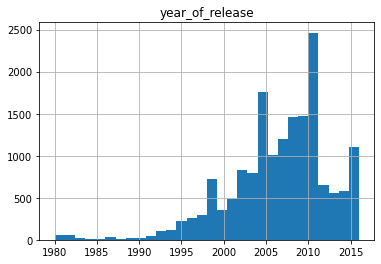

In [24]:
df.hist('year_of_release', bins=30)

Game kecenderungannya di tahun 2000an makin banyak. khususnya di tahun 2010 paling banyak game-game di rilis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 [Text(0, 0, '1980'),
  Text(1, 0, '1981'),
  Text(2, 0, '1982'),
  Text(3, 0, '1983'),
  Text(4, 0, '1984'),
  Text(5, 0, '1985'),
  Text(6, 0, '1986'),
  Text(7, 0, '1987'),
  Text(8, 0, '1988'),
  Text(9, 0, '1989'),
  Text(10, 0, '1990'),
  Text(11, 0, '1991'),
  Text(12, 0, '1992'),
  Text(13, 0, '1993'),
  Text(14, 0, '1994'),
  Text(15, 0, '1995'),
  Text(16, 0, '1996'),
  Text(17, 0, '1997'),
  Text(18, 0, '1998'),
  Text(19, 0, '1999'),
  Text(20, 0, '2000'),
  Text(21, 0, '2001'),
  Text(22, 0, '2002'),
  Text(23, 0, '2003'),
  Text(24, 0, '2004'),
  Text(25, 0, '2005'),
  Text(26, 0, '2006'),
  Text(27, 0, '2007'),
  Text(28, 0, '2008'),
  Text(29, 0, '2009'),
  Text(30, 0, '2010'),
  Text(31, 0, '2011'),
  Text(32, 0, '2012'),
  Text(33, 0, '2013'),
  Text(34, 0, '2014'),
  Text(35, 0, '2015'),
  Text(3

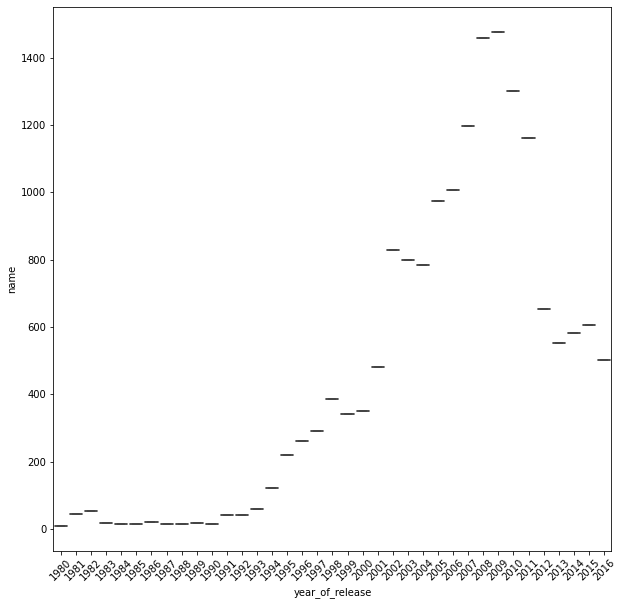

In [25]:
# jumlah game pertahun
game_per_year = df.groupby('year_of_release')['name'].count().reset_index()
plt.figure(figsize=(10,10))
sns.boxplot(data = game_per_year, x='year_of_release', y='name')
plt.xticks(rotation=45)

Penjualan game terus meningkat dari tahun 2005-2010, pada tahun 2011-2016 ada penurunan penjualan. game paling tinggi penjualannya ada pada tahun 2009 dan 2010.

<AxesSubplot:xlabel='platform'>

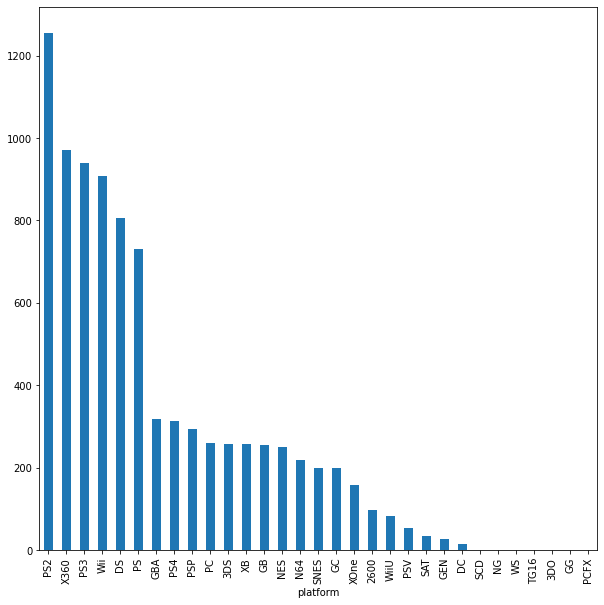

In [26]:
# penjualan per platform
plt.figure(figsize=(10,10))
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')

Dilihat dari penjualan 5 terbesar, platform yang paling populer yaitu PS2, X360, PS3, Wii, dan DS

In [27]:
#cek penjualan pertahun untuk PS2, X360, PS3, Wii, dan DS
    
def sales_per_platform(data, platform):
    df_filter = data[data['platform'] == platform]
    bars = df_filter.groupby('year_of_release')['total_sales'].sum().plot(kind='bar')
    for bar in bars.patches:
        bars.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    return bar

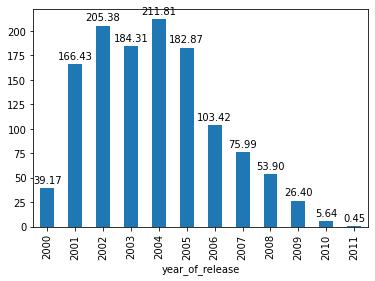

In [28]:
sales_per_platform(df, 'PS2')

Range penjualan untuk PS2 terbanyak diantara tahu 2001-2005

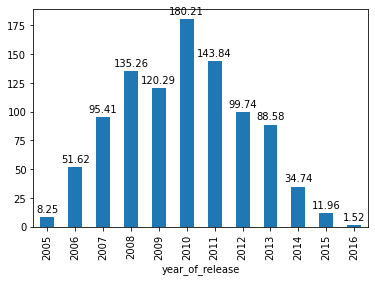

In [29]:
sales_per_platform(df, 'X360')

X360 memerlukan warktu lebih banyak dari pada PS2 untuk dapat meningkatkan penjualannya yaitu sekitar 3-4tahun, peningkatan penjualan ada pada tahun 2010, dan dapat dilihat penurunan penjualan untuk game X360 terjadi pada tahun 2011 sampai 2016.

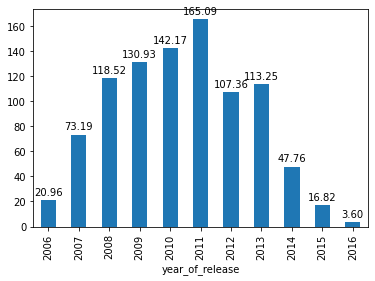

In [30]:
sales_per_platform(df, 'PS3')

Penjualan untuk game PS3 dari tahun 2006 sampai 2011 terus mengalami peningkatan, sedangakan dari 2012 sampai 2016 mengalami penurunan penjualan. penurunan pejualan game PS3 ini hampir sama dengan kasus pada game X360.

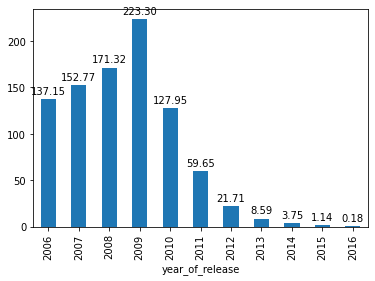

In [31]:
sales_per_platform(df, 'Wii')

Penjualan tahuan untuk game Wii dari tahun 2006 sampai 2009 mengalami peningkatan, tetapi di tahun 2010 sampai 2016 penjualan terus menurun.

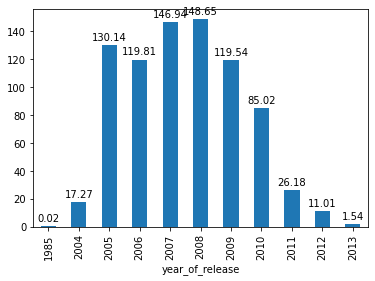

In [32]:
sales_per_platform(df, 'DS')

Penjualan tahunan unutk game DS pada tahun 2005 sampai 2008 ada peningkatan penjualan yang cukup besar, tetapi penjualan terus menurun pada tahun berikutnya. jika dilihat penjualan tahunan pada ke 5 game teratas, pola penjualannya hampir sama yaitu diantara tahun 2010 sampai 2011 penjalan semua game terus menurun. Hal ini mungkin karena minat terhadap game di 5 tahun terakhir menurun, tidak seperti di tahun 2006-2010 minat game sangat tinggi yang mengakibatkan penjualan game pun tinggi pada tahun-tahun tersebut.

Inti dari proyek ini yaitu melihat proyeksi di tahun 2017 dengan melihat dari tren di tahun-tahun sebelumnya. Tren dari 2005-2011 kecendeungan trennya terus naik, sedangkan dari 2011-2016 kecenderungannya turun, jadi dapat dilihat dari 5 tahun terakhir market game sedang tidak ada perkembangan, kecenderungannya stagnan, tidak ada peningkatan ataupun penurunan penjualan yang pesat. Berarti kemungkinan besar trennya untuk industri game di 2017 tidak akan banyak berubah, polanya mungkin akan sama seperti 5 tahun terakhir. jadi berdasarkan data diatas, dapat disimpulkan untuk proses analisis datanya akan saya ambil berdasarkan data dari 5 tahun terakhir yaitu dari tahun 2012 samapai 2016.

In [33]:
# mengambil data dari tahun 2012
df_final = df[df['year_of_release'] >= 2012 ]
df_final.shape

(2895, 12)

<AxesSubplot:xlabel='platform'>

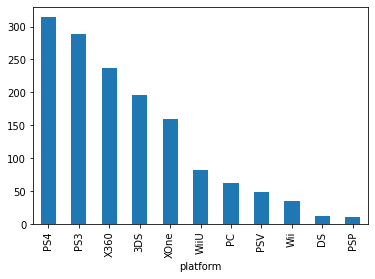

In [34]:
#penjualan perplatform
df_final.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')

penjualan paling banyak ternyata ada pada PS4, PS3, X360, 3DS dan XOne

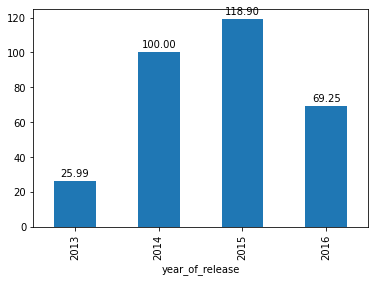

In [35]:
sales_per_platform(df_final, 'PS4')

Pada 5 tahun terakhir penjualan untuk game PS4 grafiknya positif terus mengalami peningkatan walaupun pada di tahun terakhir ada sedikit penurunan.

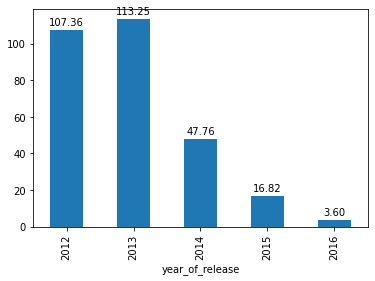

In [36]:
sales_per_platform(df_final, 'PS3')

Penjualan untuk game PS3 berbeda dengan PS4, terlihat grafiknya mengarah negatif hal ini mungkin dikarenakan pada tahun 2014-2016 trennya unutk PS3 sudah tidak populer dikarenakan adanya game PS4 yang lebih terupgrade dari pada PS3.

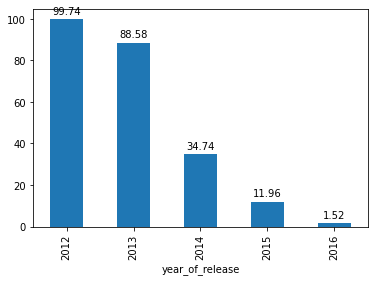

In [37]:
sales_per_platform(df_final, 'X360')

Penjualan game X360 pada 5 tahun terakhir grafiknya menunjukan penurunan penjualan dari tahun ke tahun. artinyak game X360 sudah sedikit diminati para gameres.

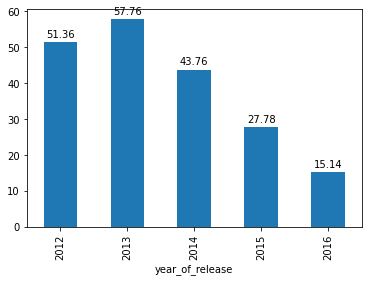

In [38]:
sales_per_platform(df_final, '3DS')

Penjualan game 3DS dari tahun 2012-2013 mengalami peningkatan penjualan tetapi pada tahun berikutnya hingga tahun 2016 terus menagalami penurunan penjualan.

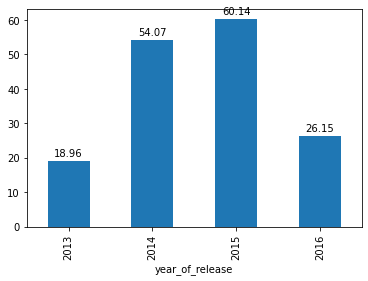

In [39]:
sales_per_platform(df_final, 'XOne')

Penjualan untuk game Xone mengalami peningkatan hingga tahun 2015 tapi mengalami penurunan di tahun terakhir yaitu tahun 2016

In [40]:
# menggabungkan data dari top 5 platform
df_top_platforms = df_final[df_final['platform'].isin(['PS4', 'PS3', 'X360', '3DS', 'XOne'])]
df_top_platforms.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


<AxesSubplot:xlabel='platform', ylabel='total_sales'>

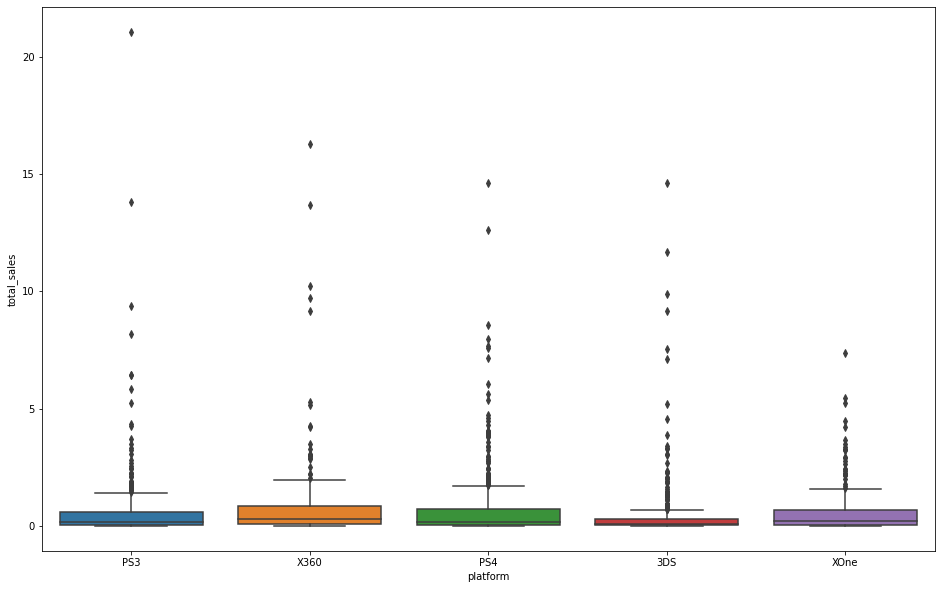

In [41]:
# membuat boxplot dari df_top_platforms
plt.figure(figsize=(16,10))
sns.boxplot(data = df_top_platforms, x='platform', y='total_sales')

Dari ke 5 platform game terdapat banyak outlier yang artinya banyak game yang penjualannya melebihi nilai median penjualan. Terlihat outlier yang sangat signifikan pada PS3 penjualannya melebhi 20 juta USD. Median dari ke 5 game tidak jauh berbeda.

In [42]:
# membuat pivot table untuk cek median dan mean total_sales berdasarkan platform
df_top_platforms.pivot_table(index='platform', values='total_sales', aggfunc=['median', 'mean','sum'])

,median,mean,sum
,total_sales,total_sales,total_sales
platform,,,
3DS,0.11,0.484653,195.80
PS3,0.20,0.585781,288.79
PS4,0.20,0.801378,314.14
X360,0.31,0.810068,236.54
XOne,0.22,0.645020,159.32


medain total_sales ke 5 platform tidak jauh berbeda, tetapi pada platform game 3DS lebih rendah median dan rata-ratanya dibandingkan platform lain, hal ini mungkin karena penjualannya tidak sebanyak platform lain.

In [43]:
# melihat bagaimana ulasan pengguna dan para kritikus memengaruhi penjualan
x_360 = df_final[df_final['platform'] == 'X360']
x_360

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
...,...,...,...,...,...,...,...,...,...,...,...,...
16448,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,NaN,4.5,E,0.01
16458,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,NaN,6.2,T,0.01
16489,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16611,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.0,2.1,T,0.01


<AxesSubplot:>

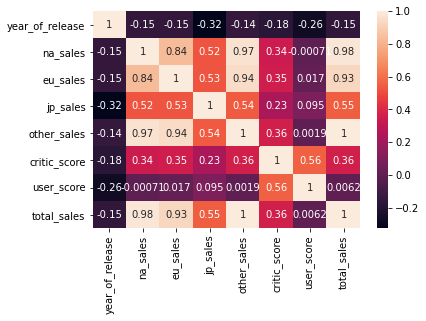

In [44]:
sns.heatmap(x_360.corr(), annot=True)

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

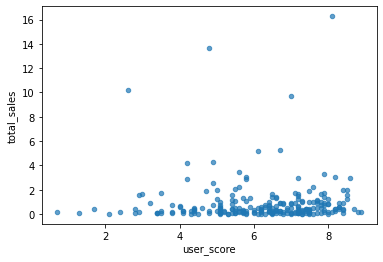

In [45]:
x_360.plot.scatter(y='total_sales', x='user_score', alpha=.7)

hanya ada sedikit peningkatan di penjualan terhadap user_score tetapi kolerasinya rendah atau hampir tidak ada korelasi, user_score tinggi tetapi total_sales tidak mengikuti, yang artinya ulasan dari pengguna tidak begitu mempengaruhi penjualan.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

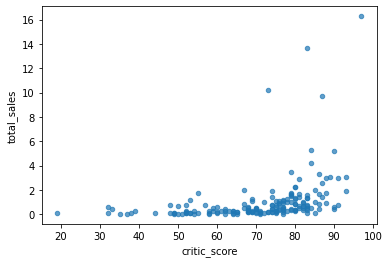

In [46]:
x_360.plot.scatter(y='total_sales', x='critic_score', alpha=.7)

sama halnya seperti pada user_score, critic_score semakin tinggi tapi total_salesnya tidak mengikuti, korelasinya rendah atau hampir tidak ada korelasi , yang artinya ulasan dari kritikus tidak begitu mempengaruhi penjualan.

In [47]:
# membuat pivot table index(name, platform) untuk cek penjualan game yang ada di multiple platform
df_final_new = df_final.pivot_table(index = ['name', 'platform'], values = 'total_sales', aggfunc='sum')
df_final_new.reset_index().sort_values(by='total_sales', ascending=False)

,name,platform,total_sales
954,Grand Theft Auto V,PS3,21.05
956,Grand Theft Auto V,X360,16.27
321,Call of Duty: Black Ops 3,PS4,14.63
1828,Pokemon X/Pokemon Y,3DS,14.60
325,Call of Duty: Black Ops II,PS3,13.79
...,...,...,...
2238,SoniPro,3DS,0.01
1051,"Horse Life 4: My Horse, My Friend, My Champion",3DS,0.01
1061,Hyakka Yakou,PSV,0.01
1062,Hyakki Yagyou Kaidan Romance,PSP,0.01


In [48]:
# distribusi game by genre

Text(0, 0.5, 'frequency')

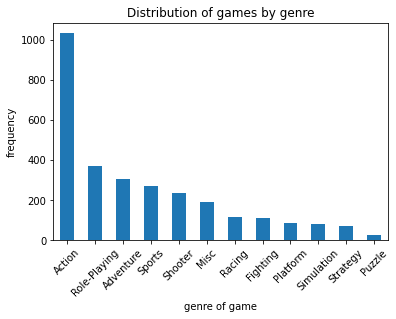

In [49]:
df_final.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of games by genre')
plt.xlabel('genre of game')
plt.xticks(rotation=45)
plt.ylabel('frequency')

Text(0, 0.5, 'total sales, million USD')

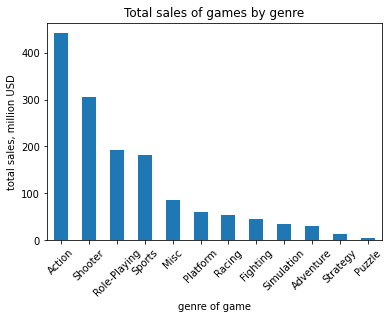

In [50]:
df_final.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total sales of games by genre')
plt.xlabel('genre of game')
plt.xticks(rotation=45)
plt.ylabel('total sales, million USD')

Genre game yang baling banyak dan menguntukngakn yaitu ada pada game action, game dengan genre shooter tidak terlalu banyak penjualannya dibandingkan 4 game teratas yg lain tetapi penjualannya ke 2 terbanyak. Mungkin kedepannya untuk strategi penjualan lebih banyak berfokus di game shooter agar penjualan dapat meningkat sehingga revenuenya pun dapat lebih meningkat juga.

## Pemprofilan pengguna berdasarkan wilayah

In [51]:
# melihat 5 platform teratas di setiap wilayah

In [52]:
# NA
def sales_platform_area(area):
    df_1 = df_final.groupby('platform')[area].sum().reset_index().sort_values(by=area, ascending= False)
    df_1['market_share'] = (df_1[area]/df_1[area].sum())*100
    return df_1.head()

In [53]:
#NA
cek_na = sales_platform_area('na_sales')
cek_na

,platform,na_sales,market_share
9,X360,140.05,23.660292
4,PS4,108.74,18.370726
3,PS3,103.38,17.465198
10,XOne,93.12,15.731856
0,3DS,56.15,9.486079


Text(0, 0.5, 'market share')

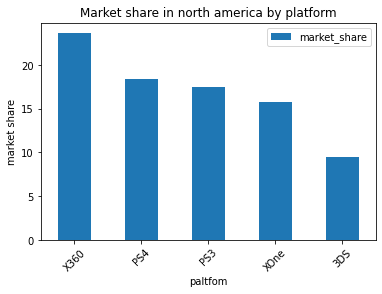

In [54]:
cek_na.plot(kind='bar', x='platform', y='market_share')
plt.title('Market share in north america by platform')
plt.xlabel('paltfom')
plt.xticks(rotation=45)
plt.ylabel('market share')

Di wilayah amerika utara 5 platform game ter atas yaitu X360, PS4, PS3, XOne dan 3DS. platform game X360 paling tinggi penjualannya

In [55]:
#EU
cek_eu = sales_platform_area('eu_sales')
cek_eu

,platform,eu_sales,market_share
4,PS4,141.09,27.824012
3,PS3,106.86,21.073598
9,X360,74.52,14.695906
10,XOne,51.59,10.173937
0,3DS,42.85,8.450343


Text(0, 0.5, 'market share')

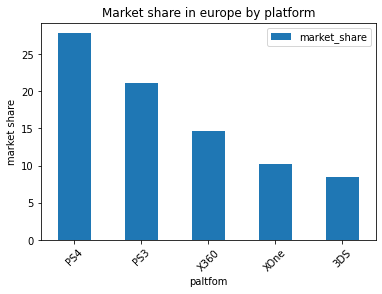

In [56]:
cek_eu.plot(kind='bar', x='platform', y='market_share')
plt.title('Market share in europe by platform')
plt.xlabel('paltfom')
plt.xticks(rotation=45)
plt.ylabel('market share')

Di wilayah eropa 5 platform game ter atas yaitu PS4, PS3, X360, XOne, dan 3DS. Platform game PS4 paling tinggi penjualannya

In [57]:
#JP
cek_jp = sales_platform_area('jp_sales')
cek_jp

,platform,jp_sales,market_share
0,3DS,87.84,45.583809
3,PS3,35.29,18.313441
6,PSV,21.11,10.954852
4,PS4,15.96,8.282304
8,WiiU,13.01,6.751427


Text(0, 0.5, 'market share')

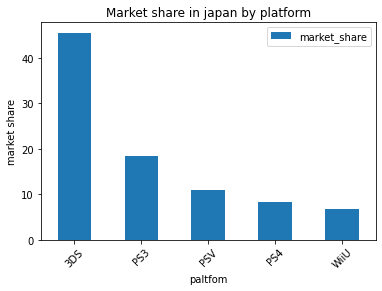

In [58]:
cek_jp.plot(kind='bar', x='platform', y='market_share')
plt.title('Market share in japan by platform')
plt.xlabel('paltfom')
plt.xticks(rotation=45)
plt.ylabel('market share')

Di wilayah jepang 5 platform game ter atas yaitu 3DS, PS3, PSV, PS4, WiiU pada wilayah jepang platform game 3DS paling tinggi penjualannya.

In [59]:
#other_sales
cek_other = sales_platform_area('other_sales')
cek_other

,platform,other_sales,market_share
4,PS4,48.35,30.938060
3,PS3,43.26,27.681085
9,X360,20.40,13.053494
10,XOne,14.27,9.131047
0,3DS,8.96,5.733299


Text(0, 0.5, 'market share')

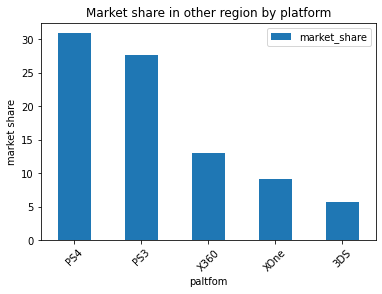

In [60]:
cek_other.plot(kind='bar', x='platform', y='market_share')
plt.title('Market share in other region by platform')
plt.xlabel('paltfom')
plt.xticks(rotation=45)
plt.ylabel('market share')

Di wilayah lain 5 platform game ter atas yaitu PS4, PS3, X360, XOne dan 3DS. pada wilayah jepang platform game PS4 paling tinggi penjualannya.

Dapat disimpullkan bahwa rata-rata game yang paling populer pada setiap wilayah yaitu game PS4, PS3, Xone, 3DS, X360 dan WiiU.

In [61]:
# melihat 5 genre game teratas di setiap wilayah

In [62]:
def sales_genre_area(area):
    df_1 = df_final.groupby('genre')[area].sum().reset_index().sort_values(by=area, ascending= False)
    df_1['market_share'] = (df_1[area]/df_1[area].sum())*100
    return df_1.head()

In [63]:
#NA
cek_na_genre = sales_genre_area('na_sales')
cek_na_genre

,genre,na_sales,market_share
0,Action,178.02,30.075010
8,Shooter,144.81,24.464455
10,Sports,81.53,13.773821
7,Role-Playing,64.11,10.830856
3,Misc,38.19,6.451885


Text(0, 0.5, 'market share')

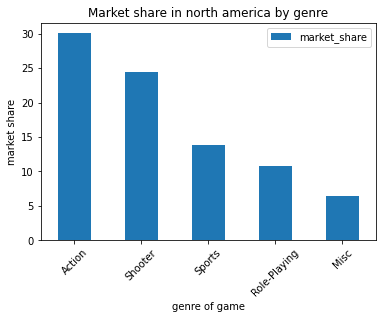

In [64]:
cek_na_genre.plot(kind='bar', x='genre', y='market_share')
plt.title('Market share in north america by genre')
plt.xlabel('genre of game')
plt.xticks(rotation=45)
plt.ylabel('market share')

Game dengan genre action, shooter, sports, role-playing dan misk menempati peringkat teratas di wilayah amerika utara. genre action menempati peringkat tertinggi.

In [65]:
#EU
cek_eu_genre = sales_genre_area('eu_sales')
cek_eu_genre

,genre,eu_sales,market_share
0,Action,159.53,31.460519
8,Shooter,113.49,22.381084
10,Sports,69.09,13.625069
7,Role-Playing,48.58,9.580342
6,Racing,27.29,5.381794


Text(0, 0.5, 'market share')

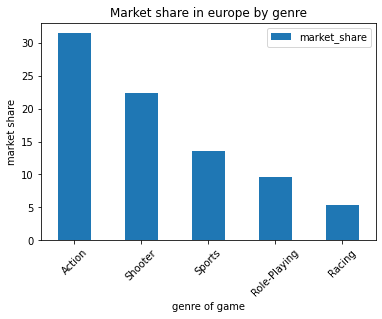

In [66]:
cek_eu_genre.plot(kind='bar', x='genre', y='market_share')
plt.title('Market share in europe by genre')
plt.xlabel('genre of game')
plt.xticks(rotation=45)
plt.ylabel('market share')

Game dengan genre action, shooter, sports, role-playing dan racing menempati peringkat teratas di wilayah eropa. genre action menempati peringkat tertinggi.

In [67]:
#jp
cek_jp_genre = sales_genre_area('jp_sales')
cek_jp_genre

,genre,jp_sales,market_share
7,Role-Playing,65.54,34.011417
0,Action,52.80,27.400104
3,Misc,12.86,6.673586
9,Simulation,10.41,5.402180
2,Fighting,9.44,4.898806


Text(0, 0.5, 'market share')

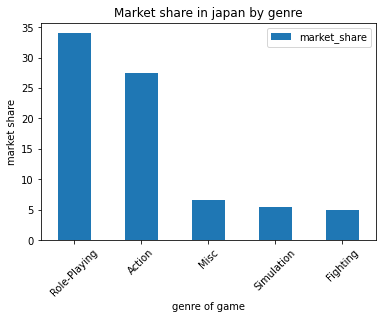

In [68]:
cek_jp_genre.plot(kind='bar', x='genre', y='market_share')
plt.title('Market share in japan by genre')
plt.xlabel('genre of game')
plt.xticks(rotation=45)
plt.ylabel('market share')

Game dengan genre role-playing, action, misk, simulation dan fighting menempati peringkat teratas di wilayah jepang. genre role-playing menempati peringkat tertinggi.

In [69]:
#other_sales
cek_other_region_genre = sales_genre_area('other_sales')
cek_other_region_genre

,genre,other_sales,market_share
0,Action,51.17,32.742513
8,Shooter,37.27,23.848221
10,Sports,22.44,14.358843
7,Role-Playing,14.86,9.508574
3,Misc,7.67,4.907858


Text(0, 0.5, 'market share')

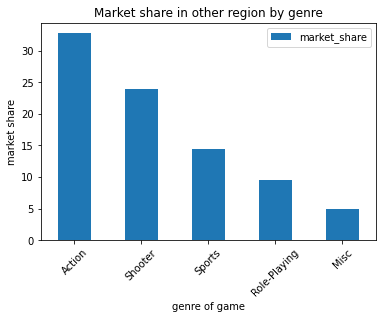

In [70]:
cek_other_region_genre.plot(kind='bar', x='genre', y='market_share')
plt.title('Market share in other region by genre')
plt.xlabel('genre of game')
plt.xticks(rotation=45)
plt.ylabel('market share')

Game dengan genre  action, shooter, sports, role-playing, dan misc menempati peringkat teratas di wilayah lain. genre action menempati peringkat tertinggi.

Jika dilihat dari semua wilayah diatas game dengan genre action menempati game paling populer. wilayah amerika utara, eropa dan wilayah lain. genre game populernya hampir sama, tetapi berbeda dengan wilayang jepang.

In [71]:
# group by rating kemudian bandingkan tiap region

In [72]:
def sales_rating_area(area):
    df_1 = df_final.groupby('rating')[area].sum().reset_index().sort_values(by=area, ascending= False)
    df_1['market_share'] = (df_1[area]/df_1[area].sum())*100
    return df_1

In [73]:
#NA
cek_na_rating = sales_rating_area('na_sales')
cek_na_rating

,rating,na_sales,market_share
2,M,231.57,47.420802
0,E,114.49,23.445211
1,E10+,75.96,15.555055
3,T,66.31,13.578932


In [74]:
#EU
cek_eu_rating = sales_rating_area('eu_sales')
cek_eu_rating

,rating,eu_sales,market_share
2,M,193.96,46.672121
0,E,113.05,27.202945
1,E10+,55.56,13.369267
3,T,53.01,12.755667


In [75]:
#jp
cek_jp_rating = sales_rating_area('jp_sales')
cek_jp_rating

,rating,jp_sales,market_share
0,E,28.33,33.802649
3,T,26.09,31.129937
2,M,21.20,25.295311
1,E10+,8.19,9.772104


In [76]:
#other_sales
cek_other_sales_rating = sales_rating_area('other_sales')
cek_other_sales_rating

,rating,other_sales,market_share
2,M,63.38,49.097529
0,E,31.46,24.370594
3,T,17.98,13.928267
1,E10+,16.27,12.603610


Semua wilayah menunjukan rating M palig banyak penjualannya kecuali di wilayah jepang yang paling banyak penjualannya yaitu game dengan rating E.

## Hipotesis

- Rata-rata rating pengguna platform Xbox One dan PC adalah sama.
- Rata-rata rating pengguna genre Action dan Sports berbeda

1. Tentukan H0 dan H1
2. Tentukan alpha, default nilai alpha 5%
3. Lakukan uji statistik (student t-test independen 2 sampel)
4. Bandingkan p-value hasil uji statistik dengan niali alpha

### Uji hipotesis rata-rata rating pengguna platform Xbox One dan PC

H0 : Rata-rata rating pengguna platform Xbox One dan PC adalah sama.

H1 : Rata-rata rating pengguna platform Xbox One dan PC adalah berbeda.

nilai alpha yaitu 5%

In [93]:
df_final

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16701,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16705,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [78]:
sampel_1 = df_final[df_final['platform']=='XOne'].dropna()['user_score']
sampel_2 = df_final[df_final['platform']=='PC'].dropna()['user_score']

In [79]:
sampel_1.mean()

6.49308176100629

In [80]:
sampel_2.mean()

6.358045977011493

In [81]:
st.levene(sampel_1, sampel_2)

LeveneResult(statistic=8.47272724881896, pvalue=0.0038494473989192884)

karena pvalue kurang dari alpha maka equal_var = False

In [82]:
alpha = 0.05
result = st.ttest_ind(sampel_1,
                     sampel_2,
                     equal_var=False)

In [83]:
result.pvalue

0.41668656393474524

In [84]:
# Uji hipotesisnya
if (result.pvalue < alpha):
    print("Tolak null hypothesis")
else:
    print("Kita gagal menolak null hypothesis")

Kita gagal menolak null hypothesis


hasil hipotesis menunjukan kita gagal menolak null hypotesis atau H0, artinya Rata-rata rating pengguna platform Xbox One dan PC adalah sama

### Uji hipotesis rata-rata rating pengguna genre Action dan Sports

H0 : rata-rata rating pengguna genre Action dan Sports sama

H1 : rata-rata rating pengguna genre Action dan Sports berbeda

nilai alpha yaitu 5%

In [85]:
sampel_3 = df_final[df_final['genre']=='Action'].dropna()['user_score']
sampel_4 = df_final[df_final['genre']=='Sports'].dropna()['user_score']

In [87]:
sampel_3.mean()

6.873995271867613

In [88]:
sampel_4.mean()

5.8161764705882355

In [89]:
st.levene(sampel_3, sampel_4)

LeveneResult(statistic=1.1698589278224438, pvalue=0.27989827368559317)

karena pvalue lebih dari alpha maka equal_var = True

In [90]:
alpha = 0.05
result = st.ttest_ind(sampel_3,
                     sampel_4,
                     equal_var=True)

In [91]:
result.pvalue

9.311884584719473e-15

In [92]:
# Uji hipotesisnya
if (result.pvalue < alpha):
    print("Tolak null hypothesis")
else:
    print("Kita gagal menolak null hypothesis")

Tolak null hypothesis


hasil hipotesis menunjukan Kita gagal menolak null hypothesis atau H0, artinya Rata-rata rating pengguna untuk genre action dan sport adalah sama.

## Kesimpulan

Dari hasil pengolahan data historis penjualan game teridentifikasi bahwa pola-pola tren game yang terjadi dari 5 tahun terakir bedasarkan penjualan yaitu market game sedang tidak ada perkembangan, kecenderungannya stagnan, tidak ada peningkatan ataupun penurunan penjualan yang pesat. Berarti kemungkinan besar trennya untuk industri game di tahun 2017 tidak akan banyak perubahan pada polanya mungkin akan sama seperti 5 tahun terakhir. kemudian dilakukan analisis data pada penjualan game di 5 tahun terakhir bahwa rata-rata game yang paling populer pada setiap wilayah yaitu game PS4, PS3, Xone, 3DS, X360 dan WiiU. sedangkan genre game yang baling banyak dan menguntukngakn yaitu ada pada game action, game dengan genre shooter tidak terlalu banyak penjualannya dibandingkan 4 genre game teratas yg lain tetapi penjualannya ke 2 terbanyak. Mungkin kedepannya untuk strategi penjualan lebih banyak berfokus di game shooter agar penjualan dapat meningkat sehingga revenuenya pun dapat lebih meningkat juga.

Disini saya melakukan hipotesis terhadap rata-rata rating pengguna platform Xbox One dan PC, dan rata-rata rating pengguna genre Action dan Sports, hasilnya yaitu rata-ratanya sama. 

Korelasi antara ulasan dari pengguna dan kritikus dengan penjualan game yaitu rendah atau hampir tidak ada korelasi, maka dapat disimpulkan suatu game dikatakan berhasil atau tidak dalam penjualannya tidak bergantung kepada ulasan pengguna dan kritikus.